In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"mini_project_2.csv")

In [3]:
df

,Accuracy (%),Avg. Reaction Time (s),label
0,66.7,1.91,average
1,76.4,1.41,average
2,95.3,1.89,excellent
3,74.2,1.22,average
4,70.8,1.35,average
5,92.8,1.34,excellent
6,98.2,1.29,excellent
7,68.9,1.48,average
8,97.6,2.12,excellent
9,63.5,1.27,average


In [4]:
from sklearn.preprocessing import LabelEncoder
df['label'] = LabelEncoder().fit_transform(df['label'])

In [5]:
df

,Accuracy (%),Avg. Reaction Time (s),label
0,66.7,1.91,0
1,76.4,1.41,0
2,95.3,1.89,1
3,74.2,1.22,0
4,70.8,1.35,0
5,92.8,1.34,1
6,98.2,1.29,1
7,68.9,1.48,0
8,97.6,2.12,1
9,63.5,1.27,0


In [6]:
df.describe()

,Accuracy (%),Avg. Reaction Time (s),label
count,16.000000,16.000000,16.000000
mean,83.131250,1.661250,0.500000
std,13.717372,0.345367,0.516398
min,63.500000,1.220000,0.000000
25%,70.425000,1.347500,0.000000
50%,84.600000,1.620000,0.500000
75%,95.650000,1.950000,1.000000
max,100.000000,2.180000,1.000000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



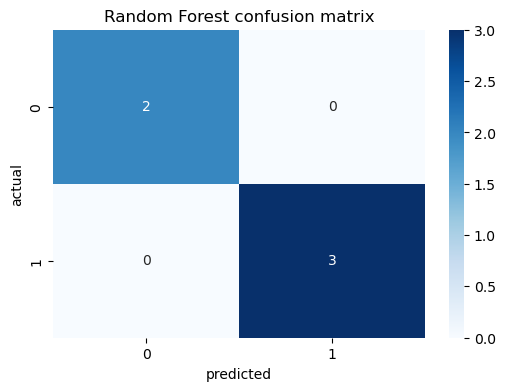

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics  import classification_report,confusion_matrix

X = df.drop('label',axis=1)
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# print(X_train)
model = RandomForestClassifier(n_estimators=20,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Random Forest confusion matrix")
plt.savefig("Random_Forest.png")
plt.show()

In [ ]:
!pip install xgboost

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



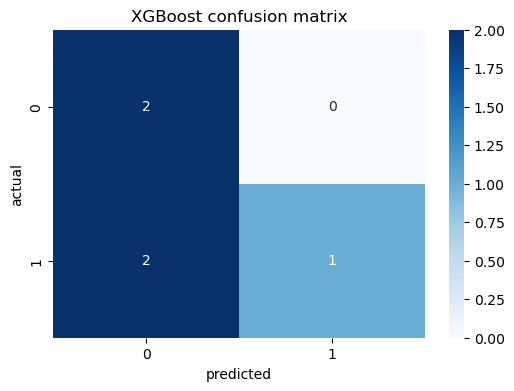

In [24]:
import xgboost as xgb 
X = df.drop('label',axis=1)
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
xgbModel = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
xgbModel.fit(X_train,y_train)
y_pred = xgbModel.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("XGBoost confusion matrix")
plt.savefig("xgboost.png")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



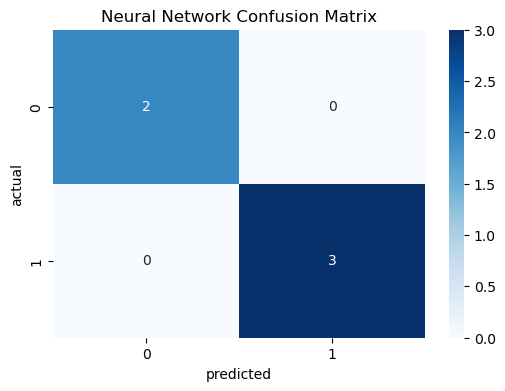

In [25]:
from sklearn.neural_network import MLPClassifier

X = df.drop('label',axis=1)
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

neural_network_model = MLPClassifier(hidden_layer_sizes=(2,),activation='identity',solver='lbfgs',max_iter=30,random_state=42)
neural_network_model.fit(X_train,y_train)
y_pred = neural_network_model.predict(X_test)
print(classification_report(y_test,y_pred))
confusionMatrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confusionMatrix,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Neural Network Confusion Matrix")
plt.savefig("neural_network.png")
plt.show()